###### Assignment for Georgetown CSET Data Scientist role
# Somaye Farhadi

__Interview - Data Scientist__

Please process and analyze the following data and compose a data story for each of the following sections. A good balance of documented code, visualization, and clarifiying prose is desired. Please submit the completed project via email.

__Semantic Scholar:__
Semantic Scholar is a search service for academic journal articles with a search API. Semantic Scholar made available a subset of the full corpus as its Open Research Corpus.
Requirements:

__Author Graph:__
Construct an author graph up to "two-neighbors" starting with publication ID 22720d75b8c73afd3bf4917fd5512dcc11e19885 from the data subset that meets the requirements of this section. In other words, starting with an author of publication ID 22720d75b8c73afd3bf4917fd5512dcc11e19885, this author graph should contain all of the author's co-authors as well as co-authors of each co-author.
What do you find interesting about this graph?

__Publication Graph:__
Construct a publication graph based on publications associated with the author graph above. This publication graph will be incomplete, because you are working with only the data subset that meets the requirements of this section. You don't need to retrieve publication data beyond the subset you're required to work with .
What do you find interesting about this graph?

__Other Data Stories:__
Please feel free to implement one idea that tells an interesting data story using Semantic Scholar Open Research Corpus.

__Scalability:__
How scalable is your solution?
_______________________________________________________________________

The following code is structured as follows:

- First, a class is definied which containes methods for various applications. These methods are for uploading data, query on various data fields (specifically, publication ID's and author ID's), network analysis, and data visualization.

- Second, the methods are implemented on a sample data set.

- Finally, some insights about the data are provided

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from itertools import chain
import itertools
import networkx as nx
import glob

__Uploading data stored in local drive.__ One could alternatively work on cloud data without downloading and locally storing them. However, for the scale of this problem, this method is sufficient and optimum:

In [2]:
#Change the following line to the folder location where the file is stored
drct = '/home/somayeh/Documents/Georgetown_CSET_assignment/'
names = glob.glob(drct+'*.json')
print(names)

['/home/somayeh/Documents/Georgetown_CSET_assignment/s2_s2-corpus-04.json', '/home/somayeh/Documents/Georgetown_CSET_assignment/s2_s2-corpus-06.json']


__Defining the class which contains methods for data analysis and visualization:__

In [3]:
# The class "Corpus_Graph_object" is defined to incorporate methods used for graph analysis. 

class Corpus_Graph_object:
    
    def __init__(self, corpusFile, val):
        self.corpusFile = corpusFile
        self.val1 = val+1
        self.val2 = val+2
        self.val3 = val+3
        self.val4 = val+4
        self.val5 = val+5
        self.val6 = val+6
    
    # This method loads the data file (which is stored as .json), and returns a 
    # pandas.DataFrame which contains all Publication_ID's in each row, and Author_ID
    # associated with each publication.
    def data_load(self):
        file = self.corpusFile
        sample_size = sum(1 for line in open(file))
        index = range(0,sample_size)
        df = pd.DataFrame(index=index)
        with open(file) as fn:  
            lncnt = 0
            ID=[]; Author_ID = []
            while ((lncnt<sample_size)):  
                ln = fn.readline()
                lncnt += 1
                d = json.loads(ln)
                ID.append(d['id'])
                authorID=[]
                for i in range(0,len(d['authors'])):
                    authorID.append (''.join(d['authors'][i]['ids']))
                Author_ID.append(authorID)    
        df['Publication_ID'] = ID    
        df['Authors_ID'] = Author_ID
        return(df)
    
    # Method to find all unique author ID's for the DataFrame['Authors_ID'] column. 
    def unique_authors(self, df):
        unique_authors = list(chain.from_iterable(DF['Authors_ID']))
        return(unique_authors)
    
    def unique_coauthors(self, DF):
        it_all = []
        for i in range(0,len(DF)):
            if not DF['Authors_ID'][i]==[]:
                it_all.append(list(itertools.combinations(DF['Authors_ID'][i], 2)))
        unique_coauthors = set(chain.from_iterable(it_all))
        return(unique_coauthors)


    # Uses Networkx to build coauthorship network. Nodes are authors. Edges are assigned 
    # between nodes if they have a coauthored publication.
    def Author_network(self, Authors, Links):
        G = nx.Graph()  # initiate a graph
        G.add_nodes_from(list(Authors)) # add nodes to the graph. Here, the nodes are the unique authors
        G.add_edges_from(Links) # adding edge based on coauthorship
        return(G)
    
    # Finds clusters of connected authors in Authorship network G.
    def connected_components_sizes(self, G):
        A=list(nx.connected_components(G))
        N=[]
        for i in range(len(A)):
            N.append(len(list(A[i])))
        return(N)    
    
    # Finds the "two-neighbor" graph for each node (as defined in the description of the assignment.)
    def two_neighbors(self, G, node):
        neighbors_1 = [n for n in G.neighbors(node)]
        neighbors_2 = []
        for i in range(len(neighbors_1)):
            neighbors_2.append([n for n in G.neighbors(neighbors_1[i])])
        neighbors_2 = [y for x in neighbors_2 for y in x]
        two_neighbors = set(neighbors_1+neighbors_2)
        return(neighbors_1,neighbors_2,two_neighbors)
    
    # This method takes a list of authors (authors0), and outputs a list of tuples which represent all
    # unique collaborations that all the list members have.
    def neighbors_graph(self, DF, unique_coauthors, authors0):
        it0 = list(itertools.combinations(authors0, 2))
        it1 = []
        for i in range(0,len(authors0)):
            it1.append([item for item in unique_coauthors if authors0[i] in item])
        it1 = list(chain.from_iterable(it1))   
        return(it1)
    
    # This method craetes a list of publications based on coauthorship
    def publications_graph(self, DF, node):
        indexs0 = int(DF[DF['Publication_ID']==node].index.values)
        authors0 = DF['Authors_ID'][indexs0]    
        data = DF['Authors_ID']
        Pub_IDs = []
        for i in range(len(DF)):
            if len([x for x in authors0 if x in data[i]])>0:
                Pub_IDs.append(DF['Publication_ID'][i])
        return(Pub_IDs)

__Creating Class object "corpus":__

In [4]:
# define object corpus
corpus = Corpus_Graph_object(names[0], 1)
corpus2= Corpus_Graph_object(names[1], 2)

In [5]:
# Reading corpus files and storing the Publication and Authors ID in pandas DataFrames.
DF1 = corpus.data_load() 
DF2 = corpus2.data_load() 

# Merging the databases from "s2_s2-corpus-06" and "s2_s2-corpus-04" to create a single DataFrame
DF = pd.concat([DF1,DF2])
DF.index = range(0, len(DF.index))

del(DF1, DF2, corpus2)
# saves the DataFrame as .pickle file
#DF.to_pickle(names[0]+names[1]'.pickle')

In [6]:
# Sanity Check: Let's check how Authors-Publications DataFrame looks like:
print(len(DF))  # Expected to have 2000000 rows
DF.head()   # view of data table structure


2000000


,Publication_ID,Authors_ID
0,6e338f498db8188143a13122f7e28dbcd3f9c4b5,[]
1,cebafb82d29a69e45a781025dac8e253459295ab,"[30027983, 1930341, 5023784]"
2,73542bcb451246bbf6d8ae553b883abf33afdc07,[37738470]
3,8abba829740252c8c842ff159c9835a96fd97035,[4999586]
4,10b63603fe7e4ba0737d8acb59a0a6b7d8901788,"[39292995, 1698907, 37067093, 31062003]"


__Creating Author Graph from the initial assigned node:__

Checking if the start ID (provided in assignment explanation) is within the data:

In [7]:
start_ID ="22720d75b8c73afd3bf4917fd5512dcc11e19885"

DF[DF['Publication_ID']==start_ID]

,Publication_ID,Authors_ID
914568,22720d75b8c73afd3bf4917fd5512dcc11e19885,"[1755139, 1765923]"


Creating a list of all collaborations (not necessary, but could be stored for scaling the problem if additional graph inqueries are needed.):

In [8]:
unique_coauthors = corpus.unique_coauthors(DF)  # list of unique collaborations (stored as a set of tuples.)

Now, starting with the assigned start_ID, I call the defined method _neighbors_graph_ in corpus object to list all of the collaborating nodes:

In [9]:
start_ID ="22720d75b8c73afd3bf4917fd5512dcc11e19885"
indexs0 = int(DF[DF['Publication_ID']==start_ID].index.values)
authors0 = DF['Authors_ID'][indexs0]

node = start_ID
it1 = corpus.neighbors_graph(DF, unique_coauthors, authors0) # list of all first_neighbor colalborations.
authors1 = set(chain.from_iterable(it1))   # unique nodes within the first_neighbor collaboration netwok
#print(unique_first_coauthors)

it2 = corpus.neighbors_graph(DF, unique_coauthors, list(authors1)[1:])  # list of all second_neighbor collaborations.
authors2 = set(chain.from_iterable(it2))   # unique nodes within the first_neighbor collaboration netwok

sub_authors = list(set.union(authors1,authors2))  # combination of authors set for 1st and 2nd neighbos. 
sub_links = list(it1+it2)


Now that we have all the authors list within distance=2, we can generate the graph using collaboration lists. 

__Network Analysis:__ Here, I have used Python-based library _Networkx_ to create the collaboration network. There are other options like _igraph_ which is much faster (and more efficient if we are dealing with larger data). However, for the purpose of this problem, Networkx is sufficient enough and more user-friendly.

In the following block, I call a method defined in class object to create the graph __G__ (the authorship network). Note that the nodes of G are the unique authors (extracted from the entire database). If two authors share a publication, there is a link (edge) between two nodes associated with the two authors.
A more complex version of this network could incorporate "weighted edges", where each edge strength is associated with frequency of coauthorship. However, for the pupose of this assignment, each link shows the existence of at least on coauthored publication.

In [10]:
G = corpus.Author_network(sub_authors, sub_links)
print(nx.info(G))
print("Average Clustering: " , nx.average_clustering(G))
N = corpus.connected_components_sizes(G)
print("Connected Components: " , N)

Name: 
Type: Graph
Number of nodes: 727
Number of edges: 931
Average degree:   2.5612
Average Clustering:  0.1885390124178123
Connected Components:  [727]


Above, a few properties of the graph network is provided

We can now draw the graph of two-neighbor we just constructed. A function is defined below for better visalization purpose:

In [11]:
# Function which takes a network and plots it using Networkx
def draw_graph(G):
    pos=nx.spring_layout(G) # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G,pos, node_color='r',node_size=5,alpha=0.4)
    #edges
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.9)

The plotted graph (below) shows interesting clustering of nodes. There are few nodes that several coauthorship has emerged.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


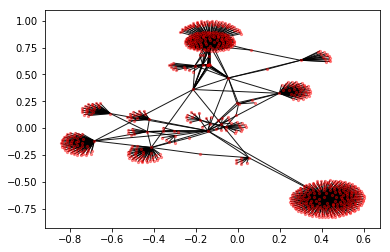

In [12]:
draw_graph(G)

The interesting thing about this graph is that there are several subgraph structures. In other words, the graph is clustered around a few "highly collaborative clusters". These clusters _could_ signify a single lab or research group, where people work and publish together.


In [13]:
# degrees = []
# for i in range(len(list(G.nodes()))):
#     degrees.append(G.degree()[list(G.nodes())[i]] )

In [13]:
del(G)
import gc
gc.collect()

2618

__Publication Graph:__
 In the next step, I cunstruct the Publication graph. For this purpose, I first find the list of publications (nodes) for the first and second neighborhood based on coauthorship. Then I construct the network using _Networkx_ similar to previous section.

In [ ]:
# creating list of all first-neighbor and second-neighbor publications starting from
# node "22720d75b8c73afd3bf4917fd5512dcc11e19885". Here, I have used "sub_authors" found before for faster computation
start_ID ="22720d75b8c73afd3bf4917fd5512dcc11e19885"

Pub_IDs = []
for j in range(0,len(DF)):
    if len([x for x in sub_authors if x in DF['Authors_ID'][j]])>0:
            Pub_IDs.append(DF['Publication_ID'][j])

In [41]:
unique_publications = list(Pub_IDs)    
all_pub_com = list(itertools.combinations(unique_publications, 2))
unique_links = []
for i in range(len(all_pub_com)):
    pb = list(all_pub_com[i])
    indexs1 = int(DF[DF['Publication_ID']==pb[0]].index.values)
    authors1 = DF['Authors_ID'][indexs1]
    indexs2 = int(DF[DF['Publication_ID']==pb[1]].index.values)
    authors2 = DF['Authors_ID'][indexs2]
    
    if len([x for x in authors1 if x in authors2])>0:
            unique_links.append(all_pub_com[i])   

KeyboardInterrupt: 

Now creating the Publication graph and plotting it:

__NOTE: The algorithm above is not optimal for craeting Publication graph, and I had to work with a subset of nodes (about 10% of all nodes) to find publication links in time. Hence, the following Publications network is not complete.__

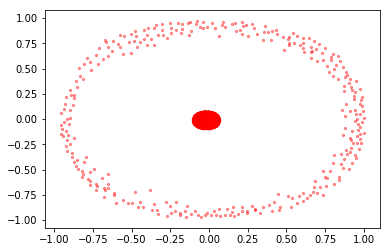

In [44]:
# Publication grah .  NOTE: NOT COMPLETE!
P = nx.Graph()
P.add_nodes_from(list(unique_publications))
P.add_edges_from(list(unique_links))

draw_graph(P)

__Other Data Stories:__
An interesting analysis is to look at the trends in research based on year. For instance we can find the top 3 popular keyworks for a few consecutive years and see how this trend changes over time.

A quicker check (for time restriction purposes) is to just analyze a few data entries. Here, I have used 1000 data points:

__Note: This part is not completed due to time restrictions. However, the method is straightforward. The results give insight on _trend changes_ over time.__

In [ ]:
# count_work returns the "entities" list, as well as publication year for a given .json file
def count_word(file, sample_size):
    with open(file) as fn:  
        lncnt = 0
        year=[]; entities = []
        while ((lncnt<sample_size)):  
            ln = fn.readline()
            lncnt += 1
            d = json.loads(ln)
            year.append(d['year'])
            entities.append(d['entities'])
    return(year,entities)


year,entities = count_word(names[0],sample_size = 1000)

__A few ideas on analysis of Semantic Scholar Open Research Corpus data:__

- We can create citation-based network (a directed graph) and find information about influence of certain topics on other topics. This analysis could be done by starting from a node and measuring the occurance of various keywords in certain distances from the node.

- One study could be analyzing collaboration clustering and understanding what influences them. Is it the topic of research (keywords), geographical closeness (if we had information on the country/city where the authors are located), or "influence" of the authors (one could imagine that giants of a field collaborate/ not collaborate often). 

- Another idea is to look at the dynamics of collaborations in time. We can implement this by creating colalboration graphs for each year and see how it evolves chronically. This way, we can identify "robust" collaborations vs. "temporary" collaborations. It is also interesting to know that whether authors participating in "long-term" and robust collaborations contribute to "significance" of their scientific production or not.

__Scalability:__
This is highly tied to the limits Networkx dictates in memory usage. Creating larger graphs is a problem if we want to analyze the network with this library. Alternative libraries such as graph-tool and igraph could be mplemented to avoid memory problems.

Another change that I would make (If I waned to write over my solution!) is to use DataFrame indexes consistently for both Author and Publication problems. This way, I can cut downb on multiple searches I peformed independently for both problems, and potentially other queries in the .json file)